In [1]:
import pandas as pd
import pickle
from ast import literal_eval
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, cohen_kappa_score, f1_score , confusion_matrix
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC , NuSVC
from germeval import *

In [2]:
vectorizer =  pickle.load(open("tl_vectorizer_without_num.pickle",'rb'))
# Text with the numbers removed
X_train = pickle.load(open("tl_X_train_without_num.pickle", "rb"))
X_test = pickle.load(open("tl_X_test_without_num.pickle", "rb"))
y_train = pickle.load( open("tl_y_train_without_num.pickle", "rb"))
y_test = pickle.load(open("tl_y_test_without_num.pickle", "rb"))
le_mapping = pickle.load(open("tl_le_mapping.pickle", "rb")) # LabelEncoder Mapping

In [3]:
def build_model(clf, X_train,y_train):
    clf.fit(X_train, y_train)
    return clf

## Linear SVC

In [4]:
X_train.shape

(16929, 638284)

In [5]:
X_test.shape

(4233, 638284)

In [6]:
y_train.value_counts()

Literatur & Unterhaltung      7305
Kinderbuch & Jugendbuch       3142
Sachbuch                      2646
Ratgeber                      2017
Ganzheitliches Bewusstsein     848
Glaube & Ethik                 687
Architektur & Garten           165
Künste                         119
Name: toplevel, dtype: int64

# Lets get some metrics

In [7]:
set(y_test.values.tolist())

{'Architektur & Garten',
 'Ganzheitliches Bewusstsein',
 'Glaube & Ethik',
 'Kinderbuch & Jugendbuch',
 'Künste',
 'Literatur & Unterhaltung',
 'Ratgeber',
 'Sachbuch'}

In [8]:
class_weight = {"Kinderbuch & Jugendbuch":1.8,"Ratgeber":3,"Sachbuch":2}

[LibLinear]

{'Sachbuch', 'Kinderbuch & Jugendbuch', 'Ganzheitliches Bewusstsein', 'Künste', 'Literatur & Unterhaltung', 'Glaube & Ethik', 'Ratgeber', 'Architektur & Garten'}
CPU times: user 5.91 s, sys: 2.45 s, total: 8.36 s
Wall time: 29.6 s


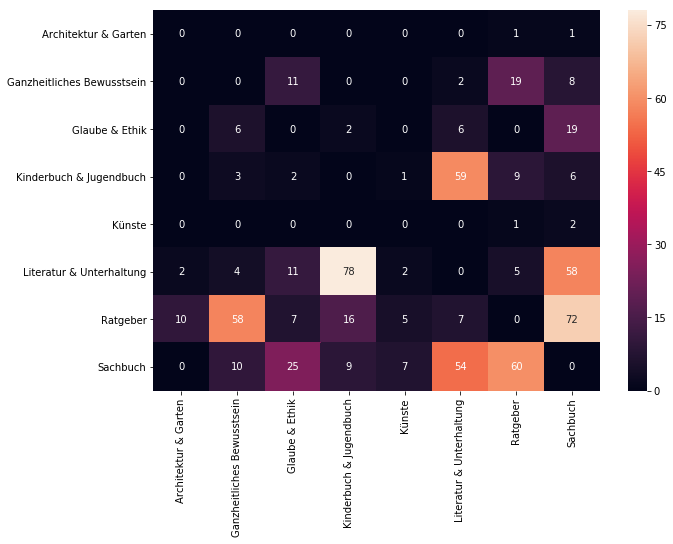

In [9]:
%%time
import gc
# data = X_train.toarray(), X_test.toarray(), y_train, y_test
lsvcclf = LinearSVC(random_state=42,verbose=1,class_weight=class_weight)
clf = build_model(lsvcclf,X_train,y_train)
y_pred = clf.predict(X_test)
push_metrics(y_pred,y_test,"linearSVC : " + str(class_weight))

print(set(y_test.values.tolist()))
%matplotlib inline
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix(y_pred,y_test.values)
np.fill_diagonal(array,0)
df_cm = pd.DataFrame(array, index = list(le_mapping.keys()),
                  columns = list(le_mapping.keys()))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,fmt=".5g")

## Word Cloud for confusion

In [34]:
from ast import literal_eval
book_df = pd.read_csv("../../data/parsed.csv")

In [35]:
def repeat_categories(df):
    lens = [len(item) for item in df['categories']]
    return pd.DataFrame({"category" : np.concatenate(df['categories'].values), 
                          "title" : np.repeat(df['title'].values,lens),
                          "description" : np.repeat(df['description'].values,lens),
                          "author" : np.repeat(df['author'].values,lens),
                          "published_date" : np.repeat(df['published_date'].values,lens)})

In [36]:
book_df["categories"] = book_df["categories"].apply(lambda categories: literal_eval(categories))

In [37]:
flat_df = repeat_categories(book_df)

In [39]:
flat_df["top_level"] = flat_df["category"].apply(lambda x:x.split(" > ")[0])

In [41]:
flat_df["combined"] = flat_df["title"] + flat_df["description"]

In [102]:
import wordcloud

In [73]:
a = flat_df.groupby("top_level")["combined"].agg(lambda x: " ".join([str(i) for i in  x.values.tolist()]))

In [74]:
type(a)

pandas.core.series.Series

In [84]:
wordsdf = pd.DataFrame([a]).transpose()

In [87]:
wordsdf["top_level"] = wordsdf.index

In [93]:
top_levels = wordsdf["top_level"].values.tolist()

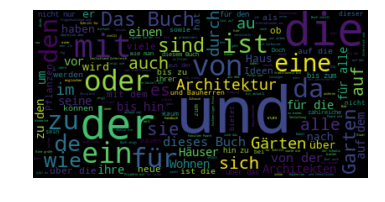

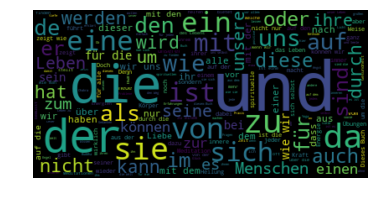

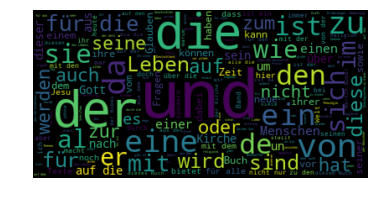

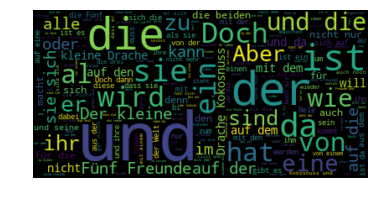

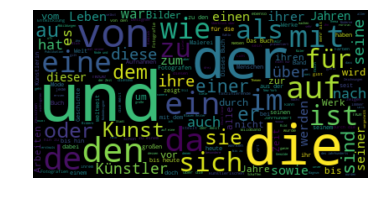

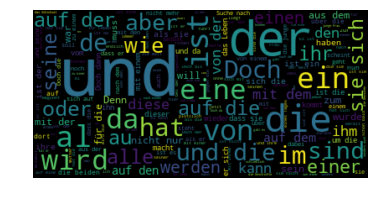

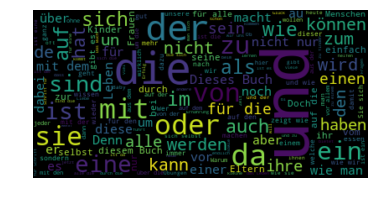

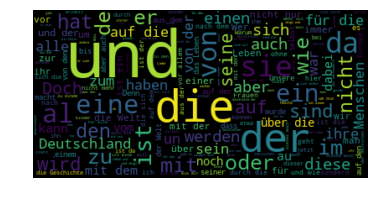

In [105]:
%matplotlib inline

from wordcloud import WordCloud

for level in top_levels:
    text = wordsdf[wordsdf["top_level"] == level]["combined"].values[0]
    wordcloud = WordCloud().generate(text)
    import matplotlib.pyplot as plt
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

In [100]:
wordsdf[wordsdf["top_level"] == "Architektur & Garten"]["combined"].values[0]

'Handbuch der Konstruktion: Möbel und EinbauschränkeDas Standardwerk der Möbelkonstruktion, als »Gelber Nutsch« bekannt, in aktualisierter und erweiterter Neuausgabe mit Berücksichtigung der neuen DIN 919 und mit zahlreichen neuen Abbildungen. Das sachgerecht gegliederte Handbuch informiert schnell und zuverlässig über alle denkbaren Konstruktionsdetails für den Bau von Möbeln und Einbauschränken. Es zeigt die Konstruktionsvarianten bei Eckverbindungen, Gestell- und Gehäusebau, Drehtüren aus Holz und Glas, Schiebetüren, Klappen, Möbelrollläden, Schubkästen und vielem mehr. Die anspruchsvolle Arbeitsunterlage für Architekten, Innenarchitekten und Tischler/Schreiner, die zugleich ein notwendiges Lehrbuch für Auszubildende und Studenten ist, enthält zahlreiche Konstruktionszeichnungen von mehr als 1000 Detailpunkten, die alle nach DIN 919 angelegt sind. Besonderer Wert wird auf die Angabe von Beschlagsherstellern gelegt. Handbuch der Konstruktion: Möbel und EinbauschränkeDas Standardwerk 

In [95]:
wordsdf

,combined,top_level
top_level,,
Architektur & Garten,Handbuch der Konstruktion: Möbel und Einbausch...,Architektur & Garten
Ganzheitliches Bewusstsein,Meine russische EnergieduscheWarten Sie nicht ...,Ganzheitliches Bewusstsein
Glaube & Ethik,Schabbat und Werktage- Die Gebetstexte durch d...,Glaube & Ethik
Kinderbuch & Jugendbuch,Supernatural Secret Agency - Die Zwergenversch...,Kinderbuch & Jugendbuch
Künste,"Ana Kraš Ikebana AlbumsFotografin, Künstlerin,...",Künste
Literatur & Unterhaltung,Die KlinikEin Blick hinter die Kulissen eines ...,Literatur & Unterhaltung
Ratgeber,Völlig losgelöstIn der Dreizimmerwohnung stape...,Ratgeber
Sachbuch,"Wenn Gott verschwindet, verschwindet der Mensc...",Sachbuch
